<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


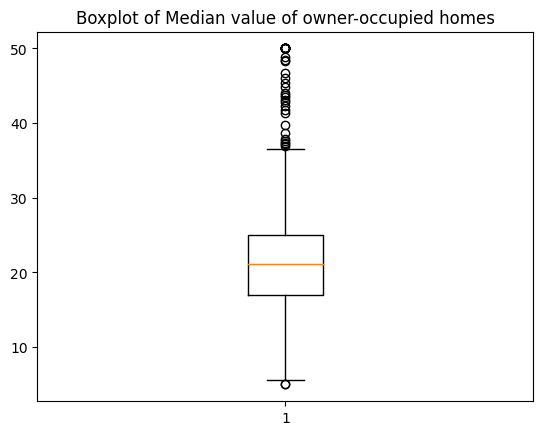

In [5]:
plt.boxplot(boston_df['MEDV'])
plt.title('Boxplot of Median value of owner-occupied homes')
plt.show()

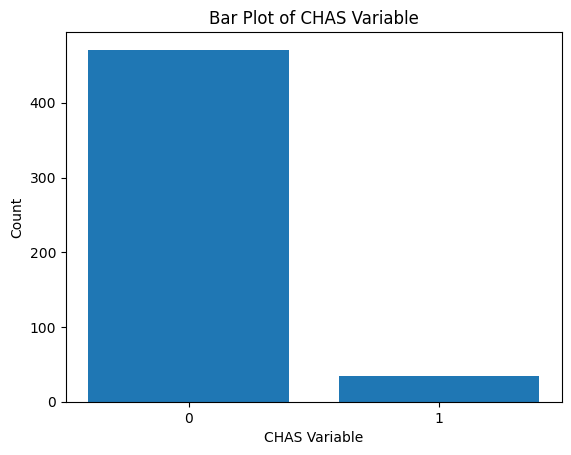

In [6]:
counts = boston_df['CHAS'].value_counts()

# Create a bar plot
plt.bar(counts.index, counts.values, tick_label=['0', '1'])
plt.xlabel('CHAS Variable')
plt.ylabel('Count')
plt.title('Bar Plot of CHAS Variable')
plt.show()

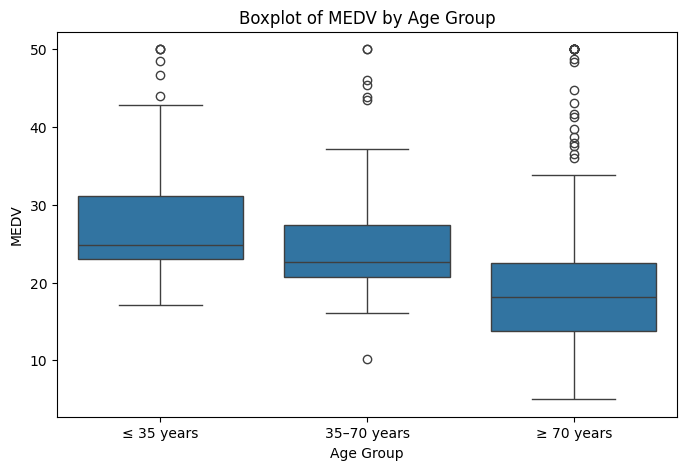

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_Group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,35–70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,≥ 70 years
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,35–70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,35–70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,35–70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,35–70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,≥ 70 years
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,≥ 70 years
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,≥ 70 years


In [12]:
# Discretize AGE into 3 groups
bins = [0, 35, 70, 100]  # Age ranges
labels = ['≤ 35 years', '35–70 years', '≥ 70 years']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=True)

# Create the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.title('Boxplot of MEDV by Age Group')
plt.show()
boston_df

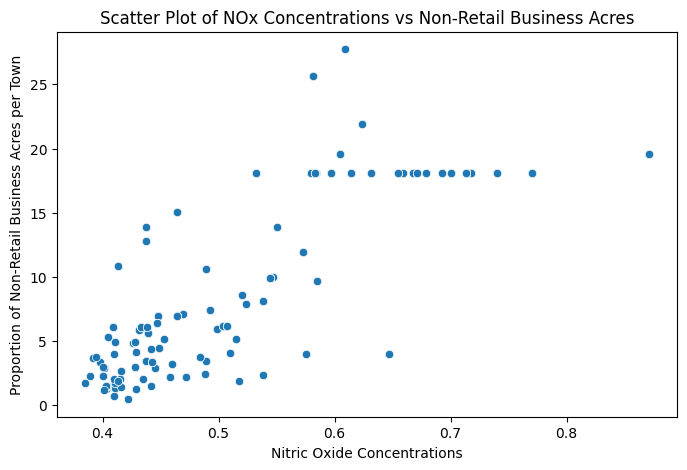

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.title('Scatter Plot of NOx Concentrations vs Non-Retail Business Acres')
plt.show()

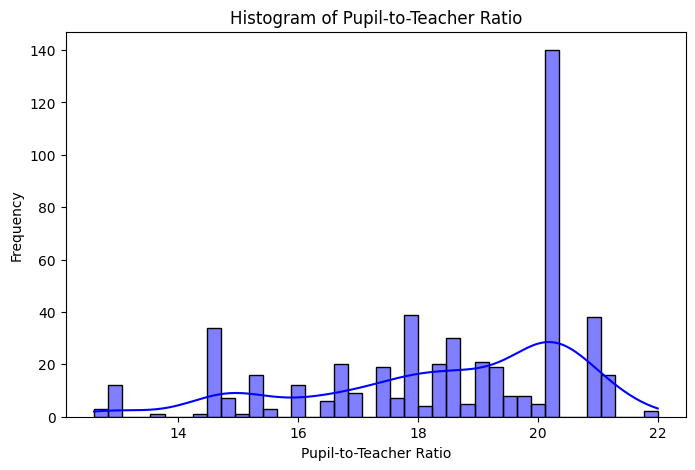

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(boston_df['PTRATIO'], bins=40, kde=True, color='blue')

# Labels and title
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Pupil-to-Teacher Ratio')

plt.show()

In [23]:
# Split into two groups
price_river = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Houses near river
price_no_river = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Houses not near river

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(price_river, price_no_river, equal_var=False)  # Welch's t-test (assumes unequal variance)

# Display results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Significant difference in price based on river proximity.")
else:
    print("No significant difference in price based on river proximity.")

T-statistic: 3.1133
P-value: 0.0036
Significant difference in price based on river proximity.


In [41]:
# Group house prices by each unique age
age_groups = []


unique_ages = boston_df['AGE'].unique()


for age in unique_ages:
    group_prices = boston_df[boston_df['AGE'] == age]['MEDV']
    age_groups.append(group_prices)

f_stat, p_value = stats.f_oneway(*age_groups)


print(f"F: {f_stat:.4f}")
print(f"P: {p_value:.4f}")


alpha = 0.05  
if p_value < alpha:
    print("There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units")
else:
    print("There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units")

F: 0.9840
P: 0.5540
There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units


In [8]:
corr_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson correlation coefficient (SciPy):", corr_coefficient)
print("P-value (SciPy):", p_value)

Pearson correlation coefficient (SciPy): 0.7636514469209192
P-value (SciPy): 7.913361061210442e-98


In [10]:
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 29 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        15:29:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0